<a href="https://colab.research.google.com/github/yvo97/k8s-webforce3/blob/master/TD1(TEKAM_TOGOM_yvan).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

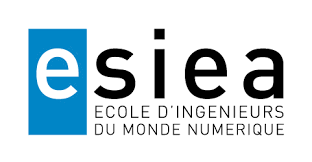

<h1 align="center">ICO 4168 - Réseaux de Neurones</h1>

# **# TEKAM TOGOM Yvan**

<h2 align="center">TD1 - Classifiez des chiffres manuscrits avec KNN</h2>

Pour ce TD, vous implémenterez plusieurs classifieurs KNN sur le jeu de données MNIST avec la librairie scikit-learn. Utilisez ce notebook Jupyter qui passe en revue chaque partie du TD pour présenter des preuves et une analyse de vos résultats

<h2 style="text-align: left; font-size: 25px"><span>📥 <strong>Import des librairies </strong></span></h2>

In [7]:
# Import Pandas
import pandas as pd

# Import Numpy
import numpy as np

# Import scipy classes
from scipy.stats import mode
from scipy.sparse import issparse, csr_matrix

# Import the package mnist from keras
from tensorflow.keras.datasets import mnist

# Import pyplot from matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline

# Import Seaborn
import seaborn as sns

# Import warnings
import warnings 
warnings.filterwarnings('ignore')

# Import Sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import check_pairwise_arrays
from sklearn.neighbors import KNeighborsClassifier

Téléchargez le jeu de données MNIST à partir de http://yann.lecun.com/exdb/mnist/ Liens vers un site externe. Il existe un jeu de données d'entraînement et un jeu de données de test. Chaque image mesure 28x28 pixels 

<h2 style="text-align: left; font-size: 25px"><span>💾 <strong>A propos du jeu de données MNIST</strong></span></h2>

Avant d'aborder l'ensemble de données, les modèles et tout le reste, nous allons d'abord comprendre en quoi consistent les données. MNIST est une collection d'images de chiffres manuscrits qui est considéré comme l'un des meilleurs jeux de données utilisés pour découvrir le machine learning. 

Le jeu de données se compose de 60 000 images d'entraînement et de 10 000 images de test servant à la conception de nos modèles. Cet ensemble de données MNIST par défaut est disponible dans le package keras. 

# 1. Chargement du jeu de données

In [8]:
# Chargement du jeu de données en 2 sous-ensembles
(trainX, trainY), (testX, testY) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Confirmons que nous avons les images manuscrits en affichant les 5 premières images. En python, les images sont affichées à l'aide du package appelé matplotlib. Nous allons donc d'abord l'importer, puis en l'utilisant, nous afficherons les images. 

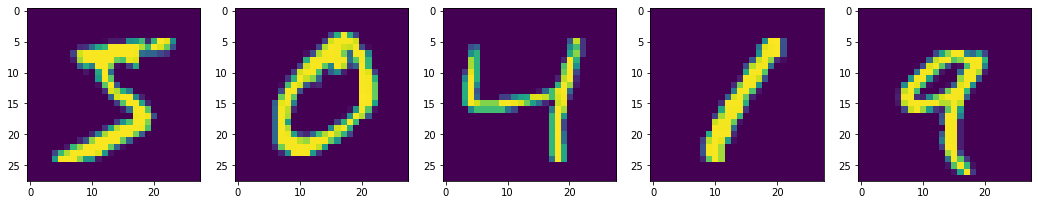

In [9]:
# Affichage des 5 premières images
plt.figure(figsize=(18, 9))

for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(trainX[i].reshape(28, 28))

plt.show()

Nous avons le chiffre 5 comme première image dans l'ensemble d'apprentissage, et les images sont de dimensions 28x28. Nous sommes donc sûrs que nos données sont authentiques.

Il est toujours utile lorsque vous travaillez avec un problème de vision par ordinateur de tracer les données avant de faire un travail de modélisation. Il s'agit d'une vérification rapide de l'intégrité qui peut éviter des erreurs facilement évitables telles qu'une mauvaise interprétation des dimensions des données 

# 2. Pré-traitement

Maintenant que nous avons chargé le jeu de données, examinons ses dimensions qui vont indiquer le nombre d'images que nous avons dans nos données.

In [10]:
# Dimensions du jeu de données
print(trainX.shape)
print(testX.shape)

(60000, 28, 28)
(10000, 28, 28)


Il semble donc qu'il y ait 60 000 images dans le jeu de données d'entrainement et 10 000 images dans le jeu de données de test. Chaque image est de taille 28*28 pixels.

Mais nous avons un problème. Avoir les images sous forme de tableau représentant les pixels de l'image, c'est-à-dire (nombre d'images, hauteur, largeur) ne va pas nous aider pour la représentation des caractéristiques alogithum KNN. Nous devons le remodeler dans le format suivant.

(Nombre d'images, largeur * hauteur)

In [11]:
# Re-dimensionnement des images
X_train = trainX.reshape(trainX.shape[0], trainX.shape[1] * trainX.shape[1])
X_test = testX.reshape(testX.shape[0], testX.shape[1] * testX.shape[1])

# Vérification du redimensionnement
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


Afin d'être sûr que nous n'avons perdu aucune information lors du redimensionnement, nous allons remettre les 5 premières images à l'ancienne dimension et essayez de l'afficher afin de vérifier si elle est lisible 

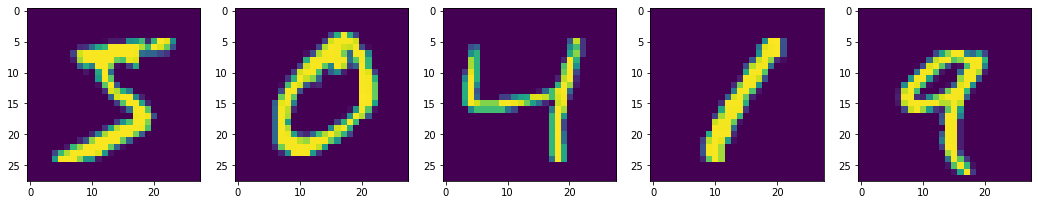

CPU times: user 533 ms, sys: 7.27 ms, total: 540 ms
Wall time: 546 ms


In [12]:
%%time
# Affichage des 5 premières images
plt.figure(figsize=(18, 9))

for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_train[i].reshape(28, 28))

plt.show()

Ainsi, cela prouve que nous avons correctement redimensionné nos images d'entrainement et de test.

Faisons maintenant un focus sur les labels des images qui indiquent le chiffre dans l'image. Vérifions les dimensions du tableau numpy. 

In [13]:
# Afficher les dimensions des vecteurs des labels
print(trainY.shape)
print(testY.shape)

(60000,)
(10000,)


Nous allons devoir redimensionner les vecteurs des labels pour les mettre en forme (longueur des labels, 1) afin de faciliter le calcul de l'algorithme KNN. 

In [14]:
# Redimensionner les vecteurs labels
y_train = trainY.reshape(len(trainY), 1)
y_test = testY.reshape(len(testY), 1)

# Vérifier les dimensions des vecteurs labels après redimensionnement
print(y_train.shape)
print(y_test.shape)

(60000, 1)
(10000, 1)


In [5]:
def display_labels(labels_array):
    labels_list = [elt[0] for elt in labels_array.tolist()]
    labels_series = pd.Series(labels_list)
    labels_series.value_counts(normalize=True).plot(kind="pie", autopct='%.2f%%', shadow=True, figsize=(12,10))

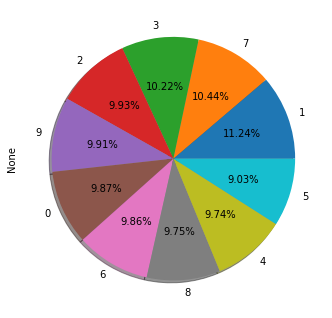

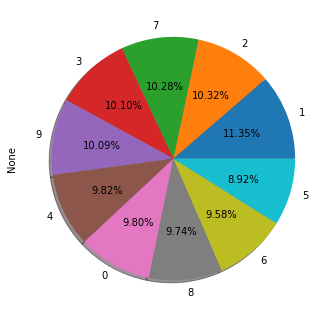

In [15]:
#plt.figure(figsize=(18, 9))
plt.subplot(1, 2, 1)
display_labels(labels_array=y_train)

plt.figure(figsize=(18, 9))
plt.subplot(1, 2, 2)
display_labels(labels_array=y_test)

plt.show()

Maintenant que nous avons fini l'analyse de nos données, commençons à répondre aux questions sur nos modèles. 

# 3. Exercice 1 : impact du type de distance

## 1.1 KNN avec distance de Manhatthan

<p style="text-align: left; font-size: 16px; color:#0f767a"><span>🖥️  Ecrivez le code permettant d'implémenter un classifieur à 1 voisin le plus proche qui considère les pixels de l'image comme un vecteur de caractéristiques. Le vecteur mesurera 28*28 = 784 dimensions (une caractéristique pour chaque pixel de l'image).<strong>Utilisez la distance de Manatthan comme paramètre de votre classifieur</strong> </span></p>

In [16]:
print(np.shape(X_test[0]))

(784,)


<p style="text-align: left; font-size: 16px; color:#0f767a"><span>🖥️  Indication : Utilisez le modèle <strong>KNeighborsClassifier</strong> de scikit-learn pour implémenter la solution. Créez d'abord le modèle et soumettez les données d'entrainement à l'aide de la méthode <strong>fit()</strong>  </span></p>

In [17]:
MM2 = KNeighborsClassifier(p=1)
MM2.fit(X_train,y_train)

KNeighborsClassifier(p=1)

<p style="text-align: left; font-size: 16px; color:#0f767a"><span>🖥️  Ecrivez le code permettant de prédire le chiffre représenté dans les images de test, et de calculer la précision (accuracy) de l'algorithme</span></p>

<p style="text-align: left; font-size: 16px; color:#0f767a"><span>🖥️  Indication : utilisez la méthode predict() du modèle KNeighborsClassifier. Enregistrez le temps qu'il a fallu pour réaliser la prédiction sur les données de test</span></p>

In [18]:
MM2.predict(X_test)

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

## 1.2 KNN avec distance euclidienne

<p style="text-align: left; font-size: 16px; color:#0f767a"><span>🖥️  Ecrivez le code permettant d'implémenter un classifieur à 1 voisin le plus proche qui considère les pixels de l'image comme un vecteur de caractéristiques. Le vecteur mesurera 28*28 = 784 dimensions (une caractéristique pour chaque pixel de l'image).<strong>Utilisez la distance de Manatthan comme paramètre de votre classifieur </strong></span></p>

In [19]:
print(np.shape(X_test[0]))

(784,)


In [22]:
MM3 = KNeighborsClassifier(n_neighbors=1, p=2)
MM3.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

<p style="text-align: left; font-size: 16px; color:#0f767a"><span>🖥️  Ecrivez le code permettant de prédire le chiffre représenté dans les images de test, et de calculer la précision (accuracy) de l'algorithme. Enrégistrez le temps de prédiction </span></p>

In [23]:
MM3.score(X_test,y_test)

0.9691

## 1.3 Analyse

<p style="text-align: left; font-size: 16px; color:#7a0f43"><span>❓  Quel est l'impact du type de distance sur la performance de l'algorithme ? Comment expliquez-vous cet impact ?</span></p>

La distance de Manhatthan effectue de lourde calcul et prend assez de temps pour de faible résultat. La distance euclidienne est plus mieux adapté a ce type de problème.

La distance de manhatthan a le plus d'impact sur le type de précision .
La distance euclidienne est moin bonne dans les distances de grandes dimensions

<p style="text-align: left; font-size: 16px; color:#7a0f43"><span>❓  Au regard de ces impacts, quelle variante de KNN retenez-vous ? </span></p>

Avec une précision de 96,91%, KNN avec K =1 semble etre un bon modèle. mais nous ne pouvont le confirmer avec présision car il y a d'autres moyens que nous pouvont utiliser pour mieux ameliorer les performances du modède.

Avec une précision de 96,91%, KNN avec K = 1 (distance euclidienne) semble être un bon modèle dans l'ensemble. Mais nous ne pouvons pas encore confirmer cela, car il existe des moyens que nous pouvons utiliser pour améliorer les performances du modèle.

# 2. Exercice 2 : Précision pour chaque chiffre manuscrit

## 2.1 Extraction des sous ensembles du jeu de test correpondant à un chiffre

### Fonction d'extraction

La fonction get_data_by_digit() prend en entrée la liste complète des images de chiffres manuscrits, leurs labels et un chiffre cible, et renvoie la liste des images de chiffres manusscrits et leurs labels correspondant au chiffre-clé renseigné

In [24]:
def get_data_by_digit(X, y, digit):
    
    '''
    Fonction pour sélectionner les données correspondant à un chiffre manuscrit donné

            Parameters:
                    X (Numpy Array): Vecteur contenant l'ensemble des images aplaties dans laquelle faire la sélection
                    y (Numpy Array): Vecteur contenant les labels des images contenus dans X
                    digit (int): Valeur entière contenant le chiffre manuscrit dont les images sont à sélectionner

            Returns:
                    X_digit_test (Numpy Array): Vecteur contenant l'ensemble des images aplaties correspondant au chiffre manuscrit "digit" spécifié
                    y_digit_test (Numpy Array): Vecteur contenant les labels des images contenus dans X_digit_test
                    
    '''
        
    y_test_list = [elt[0] for elt in y.tolist()]
    index_list = [i for i, elt in enumerate(y_test_list) if elt == digit]
    
    X_digit_test = X[index_list]
    y_digit_test = y[index_list]
    
    return X_digit_test, y_digit_test

### Extraction des données pour un chiffre donné

<p style="text-align: left; font-size: 16px; color:#0f767a"><span>🖥️  Ecrivez le code permettant de récupérer la liste des images de chiffres "5" manuscrits et les labels associés</span></p>

In [25]:
X_test_digit_5, y_test_digit_5 = get_data_by_digit(X_test, y_test, 5)

<p style="text-align: left; font-size: 16px; color:#0f767a"><span>🖥️  En vous inspirant du code du paragraphe "Pré-traitement", afficher les 4 premiers chiffres correspondants au chiffre manuscrit "5"</span></p>

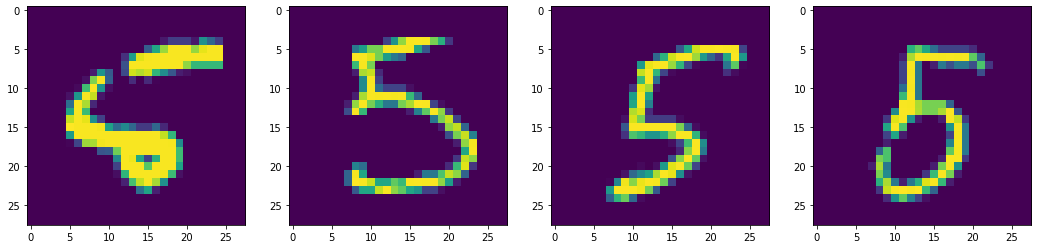

In [27]:
plt.figure(figsize=(18, 9))

for j in range(4):
    plt.subplot(1, 4, j+1)
    plt.imshow(X_test_digit_5[j].reshape(28,28))

plt.show()



## 2.2 Calcul de la performance de l'algorithme pour chaque chiffre

<p style="text-align: left; font-size: 16px; color:#0f767a"><span>🖥️  Ecrivez le code permettant de faire la prédiction, de calculer et d'afficher la précision (accuracy) pour chaque groupe de chiffre du jeu de données de test</span></p>

In [46]:
accuracy = []
for j in range(0,10):
  X_test_digit, y_test_digit = get_data_by_digit(X_test, y_test, j)
  accuracy.append(MM3.score(X_test_digit, y_test_digit))

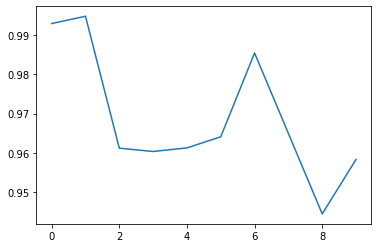

In [41]:
plt.plot(accuracy)
plt.show()

## 2.3 Analyse

<p style="text-align: left; font-size: 16px; color:#7a0f43"><span>❓  Sur quels chiffres le modèle fonctionne-t-il le mieux ? </span></p>

In [72]:
print(f"sur les chiffre 0 avec pour précision \n0: {accuracy[0]}")

sur les chiffre 0 avec pour précision 
0: 0.9928571428571429


In [73]:
print(f"sur le chiffre 1 avec pour précision \n1: {accuracy[1]} ")

sur le chiffre 1 avec pour précision 
1: 0.9947136563876652 


In [74]:
print(f"sur le chiffre 6 avec pour précision \n6: {accuracy[6]}")

sur le chiffre 6 avec pour précision 
6: 0.9853862212943633


<p style="text-align: left; font-size: 16px; color:#7a0f43"><span>❓  Sur quels chiffres le modèle fonctionne-t-il le moins bien ? </span></p>

In [77]:
print(f"sur les chiffres 2,3,4,5,7,8 et 9 avec une précision respective \n2: {accuracy[2]}, \n3: {accuracy[3]}, \n4: {accuracy[4]}, \n5: {accuracy[5]}, \n7: {accuracy[7]}, \n8 {accuracy[8]}, \n9 {accuracy[9]}")

sur les chiffres 2,3,4,5,7,8 et 9 avec une précision respective 
2: 0.9612403100775194, 
3: 0.9603960396039604, 
4: 0.9613034623217923, 
5: 0.9641255605381166, 
7: 0.9649805447470817, 
8 0.944558521560575, 
9 0.958374628344896


# 3. Exercice 3 : impact de la taille du jeu de données d'apprentissage

L'idée ici est de vérifier comment la taille du jeu de donnée d'entrainement influe sur les performances du système

## 3.1 Sous-échantillonage à 1000 échantillons

Afin de sous-échantillonner le jeu de données, choisissons les 1000 premiers images du jeu de données et les 1000 labels associés

In [56]:
N=1000
X_train_sampled = X_train[:N]
y_train_sampled = y_train[:N]

### 3.1.1 Affichage de la distribution des labels

<p style="text-align: left; font-size: 16px; color:#0f767a"><span>🖥️  Ecrivez le code permettant d'afficher la répartition des images par chiffre. Aidez-vous de la fonction display_labels()</span></p>

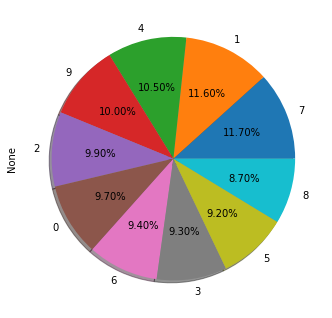

In [59]:
plt.figure(figsize=(18, 9))
plt.subplot(1, 2, 2)
display_labels(labels_array=y_train_sampled)

plt.show()

### 3.1.2 Entrainement du KNN

<p style="text-align: left; font-size: 16px; color:#0f767a"><span>🖥️  Ecrivez le code permettant d'entrainer un algorithme KNN sur le jeu de données sous-échantillonné à 1000 exemples</span></p>

In [63]:
MM4 = KNeighborsClassifier(n_neighbors=1, p=2)
MM4.fit(X_train_sampled,y_train_sampled)

KNeighborsClassifier(n_neighbors=1)

### 3.1.3 Calcul de la précision pour chaque chiffre du jeu de test

<p style="text-align: left; font-size: 16px; color:#0f767a"><span>🖥️  Ecrivez le code permettant de faire la prédiction, de calculer et d'afficher la précision (accuracy) pour chaque groupe de chiffre du jeu de données de test</span></p>

In [67]:
accuracy_2 = []
for j in range(0,10):
  X_test_digit, y_test_digit = get_data_by_digit(X_test, y_test, j)
  accuracy_2.append(MM4.score(X_test_digit, y_test_digit))

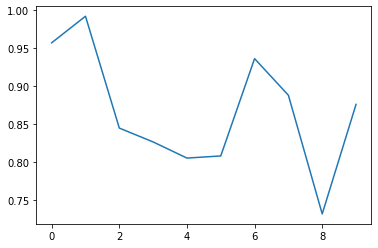

In [68]:
plt.plot(accuracy_2)
plt.show()

### 3.1.4 Analyse

<p style="text-align: left; font-size: 16px; color:#7a0f43"><span>❓  Comment analysez-vous la performance de ce modèle par rapport au modèle entrainé sur l'échantillon complet ? </span></p>

In [71]:
print(f"la performance de ce modèle n'est pas très bonne, on remarque que le resultat est passé de 0,94 a 0,72, d'ou la précision redéscendu tres bas.")

la performance de ce modèle n'est pas très bonne, on remarque que le resultat est passé de 0,94 a 0,72, d'ou la précision redéscendu tres bas.


<p style="text-align: left; font-size: 16px; color:#7a0f43"><span>❓  Quel est le chiffre dont la prédiction est la moins performante ? Comment expliquez-vous cette baisse de performance pour ce chiffre en particulier par rapport aux autres ? </span></p>

In [80]:
print(f"le chiffre qui n'a pas un bon resultat est 8. En fesant la comparaison entre les données correspondantes et précision obtenue , on se rend compte que la bonne répartition des données par classe excellente.\n 1: 11,6% et 8: 8,7%")

le chiffre qui n'a pas un bon resultat est 8. En fesant la comparaison entre les données correspondantes et précision obtenue , on se rend compte que la bonne répartition des données par classe excellente.
 1: 11,6% et 8: 8,7%


## 3.2 Sous-échantillonage à 10000 échantillons

Appliquez les mêmes instructions que pour l'échantillonnage à 1000 échantillons

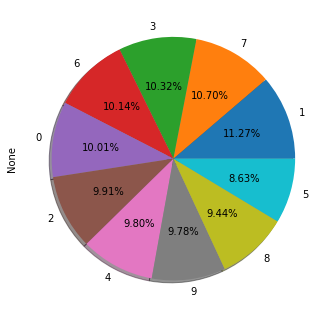

In [82]:
N=10000
X_train_sampled = X_train[:N]
y_train_sampled = y_train[:N]

plt.figure(figsize=(18, 9))
plt.subplot(1, 2, 2)
display_labels(labels_array=y_train_sampled)

plt.show()

<p style="text-align: left; font-size: 16px; color:#0f767a"><span>🖥️  Ecrivez le code permettant d'entrainer un algorithme KNN sur le jeu de données sous-échantillonné à 10000 exemples</span></p>

In [83]:
MM5 = KNeighborsClassifier(n_neighbors=1, p=2)
MM5 .fit(X_train_sampled,y_train_sampled)

KNeighborsClassifier(n_neighbors=1)

<p style="text-align: left; font-size: 16px; color:#0f767a"><span>🖥️  Ecrivez le code permettant de faire la prédiction, de calculer et d'afficher la précision (accuracy) pour chaque groupe de chiffre du jeu de données de test</span></p>

In [87]:
accuracy_3 = []
for j in range(0,10):
  X_test_digit, y_test_digit = get_data_by_digit(X_test, y_test, j)
  accuracy_3.append(MM5.score(X_test_digit, y_test_digit))

<p style="text-align: left; font-size: 16px; color:#7a0f43"><span>❓  Comment analysez-vous la performance de ce modèle par rapport au modèle entrainé sur l'échantillon complet et celui sur l'échantillonnage à 1000 échantillons ? </span></p>

In [89]:
print(f"on remarque que la courbe bleu est bien plus precise que lacourbe orange celui ci represente un echantillon de 10000.\n Ce qui signifi que la quantité et ainsi que la qualité on une très grande influance sur la prédiction de l'algorithme.")

on remarque que la courbe bleu est bien plus precise que lacourbe orange celui ci represente un echantillon de 10000.
 Ce qui signifi que la quantité et ainsi que la qualité on une très grande influance sur la prédiction de l'algorithme.


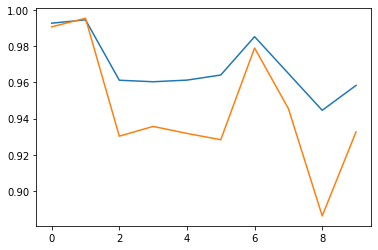

In [88]:
plt.plot(accuracy)
plt.plot(accuracy_3)
plt.show()

<p style="text-align: left; font-size: 16px; color:#7a0f43"><span>❓  Quel est le chiffre dont la prédiction est la moins performante ? Comment expliquez-vous cette baisse de performance pour ce chiffre en particulier par rapport aux autres ? </span></p>

In [90]:
print(f" Le chiffre donc la prédiction est la moins performante est 8. Ainsi la baisse de la performance pour ce chiffre est du au fait de la taille de l'echantillon d'entrainnement.")

 Le chiffre donc la prédiction est la moins performante est 8. Ainsi la baisse de la performance pour ce chiffre est du au fait de la taille de l'echantillon d'entrainnement.


# 4. Exercice 4 : Choisissez la bonne valeur de k

L'idée ici est de déterminer quelle valeur de k permet de produire la meilleure performance pour le KNN. Vous étudierez pour chaque valeur de k entre 1 et 15, la précision du modèle et son temps de prédiction

In [91]:
KMAX = 15

## 4.1 Entrainement pour plusieurs valeurs de k

<p style="text-align: left; font-size: 16px; color:#0f767a"><span>🖥️  Ecrivez le code permettant d'entrainer, de tester et d'afficher la précision (accuracy) d' un algorithme KNN de manière itérative en incrémentant de 1 le nombre de voisins différent à chaque itération. Mesurez à chaque itération, le temps necessaire pour l'entrainement et le test. Incrémentez le nombre de voisins de 1 à 15</span></p>

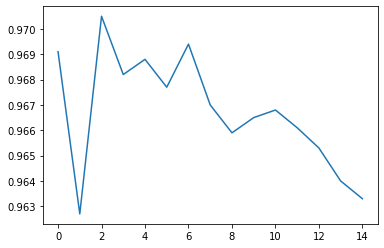

le temps pour chaque execution :
[34.80443000793457, 32.88823747634888, 33.82765007019043, 36.70783567428589, 36.70098662376404, 36.737133264541626, 37.05987858772278, 37.04244613647461, 37.10236191749573, 36.97358965873718, 37.06183195114136, 37.02777671813965, 37.17196726799011, 37.11748194694519, 37.46885681152344]
le temps total est 545.6924641132355


In [96]:
import time 
result_kn = []
t = []
for j in range(1,16):
 t0 = time.time()
 kn = KNeighborsClassifier(n_neighbors=j)
 kn.fit(X_train, y_train)
 result_kn.append(kn.score(X_test, y_test))
 t1 = time.time()
 t.append(t1-t0)
plt.plot(result_kn)
plt.show()

print(f"le temps pour chaque execution :\n{t}")
print(f"le temps total est {sum(t)}")

## 4.2 Analyse

<p style="text-align: left; font-size: 16px; color:#7a0f43"><span>❓  Pour quelle valeur de k le biais du modèle est-il le plus élevé ?
 </span></p>

In [97]:
print(f"Pour k = 15")

Pour k = 15


<p style="text-align: left; font-size: 16px; color:#7a0f43"><span>❓  Pour quelle valeur de k la variance du modèle est-elle la plus élevé ?
 </span></p>

In [98]:
print(f"pour k = 1")

pour k = 1


<p style="text-align: left; font-size: 16px; color:#7a0f43"><span>❓  Quelle est le meilleur compromis biais-variance ?
 </span></p>

In [99]:
print("Le meilleur compromis biais-variance est k = 2 , on retrouve des bons resultats.")

Le meilleur compromis biais-variance est k = 2 , on retrouve des bons resultats.


## Fin du TD